## Project Overview

In this project, we will use multiple linear regression to predict health insurance premiums based on various customer attributes. 

Our goal is to develop a model that can estimate insurance costs using features such as `age`, `gender`, `BMI`, `number of children`, `smoking habits`, and `geographical location`:
- sex: insurance contractor gender, female, male
- bmi: Body mass index (ideally 18.5 to 24.9)
- children: Number of children covered by health insurance / Number of dependents
- smoker: smoking habits
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

We’ll work with real-world data and utilise **Artificial Neural Network (ANN)** to build and refine our regression model. This project will enhance our understanding of how to handle multiple inputs and apply regression techniques to practical scenarios. 

## Artificial Neural Network Recap
<!-- ![Single Neuron Computation](single_neuron_calc.png){: style="width:50%;" } -->
<img src="single_neuron_calc.png" alt="Single Neuron Computation" width="50%"  style="display: block; margin: 0 auto;">

- **Network Structure**: Input layer, hidden layers, output layer.
- **Data Division**: Split into training data and testing data.
   1. **80/20 Split**: 80% for training, 20% for testing.
   2. **Three-way Split**: Training, validation (20%), and testing (20%). Training data (for learning), validation data (to avoid overfitting), testing data (final evaluation).
      - **Validation Data**: Monitors generalization and overfitting.
      - Track training error and validation error during each epoch.
      - Overfitting occurs if training error decreases while validation error increases.
  
### Initial Setup
- **Weight Initialization**: Randomly initialized weights.
- **Predictions (Ŷ)**: Initially meaningless (garbage output).

### Error Calculation
- **Error**: Difference between predictions and true output.
- **Guidance for Updates**: Error indicates how to adjust weights.

### Learning Process
- **Iterative Learning**: Similar to human learning; requires experience.
- **Mean Squared Error**: High initially, decreases with training until minimised.
  
### Testing the Model
- **Frozen Weights**: After training, weights are fixed.
- **Testing Data**: Must be unseen during training to assess generalization.

### Gradient Descent Algorithm

Gradient descent as an optimization method for ANN training. It Adjusts weights and biases to minimize error.  
Conceptual Analogy: Think of descending a mountain to reach the lowest point.
- **Process**: Calculate gradient (derivative of the cost function) to find minimum error.

#### Gradient Descent Steps
1. **Calculate Gradient**: Derivative of cost function.
2. **Move in Negative Direction**: Update weights to minimise error.

#### Challenges
- **Local Minimum Problem**: Risk of getting stuck in local minima instead of finding global minimum.

#### Learning Rate
- **Definition**: Determines update step size for weights.
- **Impact**: High learning rate = faster learning but risk of overshooting; low learning rate = slower learning but more precise.

#### Algorithm Steps
1. Formulate loss function.
2. Calculate gradient.
3. Pick initial weights.
4. Compute step size (learning rate × gradient).
5. Update weights (subtract step size).
6. Repeat until optimal weights are found.

Gradient descent involves iterative updates until error is minimized.

### Backpropagation Algorithm

Backpropagation for training ANNs by calculating gradients. It is the method for updating weights in ANNs based on error from predictions.

#### Steps in Backpropagation
1. **Forward Path**: Feed inputs through the network.
2. **Error Calculation**: Determine difference between predicted and actual values.
3. **Backpropagation of Error**: Propagate the error backward to update weights.
4. **Weight Update**: Adjust weights using calculated gradients.

#### Key Concepts
- **Learning Rate**: Influences speed and accuracy of learning. Greater ratio = faster training; lower ratio = more accuracy.

Backpropagation effectively updates weights by utilizing gradient descent.

## Set-up

In [1]:
# SET MODULE PATH TO ACCESS OTHER PYTHON CODES
from pathlib import Path
import sys
import os

def _set_module_path(dir_level_up: str) -> None:
    """In Jupyter Lab, the __file__ variable is not available as it is not a standalone script, but rather an interactive environment.
    Instead, you can use Path.cwd() to get the current working directory.
    """
    # Create a Path object for the current working directory
    current_dir = Path(globals().get("__vsc_ipynb_file__")) if "__vsc_ipynb_file__" in globals() else Path.cwd() #  #Path(__vsc_ipynb_file__)

    # Create a Path object for the directory level up
    script_dir = current_dir / dir_level_up

    # Get the absolute path of the script_dir
    script_dir_abs = script_dir.resolve()

    sys.path.append(str(script_dir_abs))
    return str(script_dir_abs)


root_path = _set_module_path("../../..")
os.chdir(root_path)
print(f"Project root directory: {root_path}")
print(f"python running from: {sys.executable}")
# print(sys.prefix)
# !which python
!which pip
# !pwd
# envrc_path = f"{root_path}/.envrc"
# print(f"envrc_path: {envrc_path}")

Project root directory: /Users/arifur.rahman/projects/scratchpad/predictive-analysis-sagemaker
python running from: /Users/arifur.rahman/projects/scratchpad/predictive-analysis-sagemaker/.venv/bin/python
/Users/arifur.rahman/projects/scratchpad/predictive-analysis-sagemaker/.venv/bin/pip


In [2]:
from dotenv import load_dotenv, find_dotenv

for f_env in [".env", ".env.override"]:
    load_dotenv(find_dotenv(f_env))
# load_dotenv(dotenv_path="../.env")


print(os.getcwd())
print(os.getenv("ENVIRONMENT"))

/Users/arifur.rahman/projects/scratchpad/predictive-analysis-sagemaker
dev


In [3]:
from dotenv import load_dotenv, find_dotenv

for f_env in [".env", ".env.override"]:
    load_dotenv(find_dotenv(f_env))
# load_dotenv(dotenv_path="../.env")


print(os.getcwd())
print(os.getenv("ENVIRONMENT"))

/Users/arifur.rahman/projects/scratchpad/predictive-analysis-sagemaker
dev


## Logger definition

In [4]:
from predictive_analysis_sagemaker.src.logger_utils import logger


logger.info(os.environ.get("ENVIRONMENT"))
logger.error(os.environ.get("ENVIRONMENT"))

[2024-11-04 19:53:38][3417429718.py(4)][<module>()]INFO: dev
[2024-11-04 19:53:38][3417429718.py(5)][<module>()]ERROR: dev


## Import libraries and datasets

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [6]:
df_premium = pd.read_csv("./data/raw/insurance.csv")
display(df_premium.head(3))  # tail(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# Exploratory Data Analysis

For detail data exploratory analysis, please check `multi_linear_regression.ipynb`

## Pre-process categorical data

In [7]:
df_premium.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
for category_col in ["sex", "smoker", "region"]:
    print(f"Unique values for category [{category_col}]: {df_premium[category_col].unique()}")

Unique values for category [sex]: ['female' 'male']
Unique values for category [smoker]: ['yes' 'no']
Unique values for category [region]: ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
# Use Label Encoding for `sex` and `smoker` column, where as one-hot encoding for `region`

# Label Encoding (another option is sklearn.preprocessing.LabelEncoder)
df_premium["sex"] = df_premium["sex"].apply(lambda x: 0 if x == "female" else 1)  # female=0, male=1
df_premium["smoker"] = df_premium["smoker"].apply(lambda x: 0 if x == "no" else 1)  # no=0, yes=1

# One-Hot Encdoing (another option is sklearn.preprocessing.OneHotEncoder)
region_dummies = pd.get_dummies(
    df_premium["region"], drop_first=True, dtype=int
)  # Get k-1 dummies out of k categorical levels by removing the first level.
display(region_dummies)

df_premium = pd.concat([df_premium, region_dummies], axis=1)
display(df_premium.head())

df_premium.drop(["region"], axis=1, inplace=True)
display(df_premium.head())

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [10]:
df_premium.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


## Data Visualisation

For data visualisation, please check `multi_linear_regression.ipynb`

## Training and Testing Dataset

In [11]:
print(f"All columns: {df_premium.columns}")

All columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')


In [12]:
# Remove the target variable
X = df_premium.drop(columns=["charges"])
y = df_premium["charges"]
display(X.head())
display(y.head())
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

X.shape: (1338, 8), y.shape: (1338,)


In [13]:
# Convert to numpty array
X_np = np.array(X).astype("float32")
y_np = np.array(y).astype("float32")

# Convert into batch format
y_np = y_np.reshape(-1, 1)
print(f"X_np.shape: {X_np.shape}, y_np.shape: {y_np.shape}")

X_np.shape: (1338, 8), y_np.shape: (1338, 1)


### Scale the data

We need to scale the data before feeding it into a machine learning model because many models, like linear regression, SVMs, and neural networks, are sensitive to the magnitude of features. Unscaled data can lead to:
- **Poor model performance**: Models may struggle to converge or give biased importance to larger-valued features.
- **Longer training times**: Optimization algorithms may take longer to find the optimal solution.

**When to scale**: Look for algorithms that use distance-based metrics (e.g., k-NN, SVM) or gradient-based optimizers (e.g., neural networks) and ensure that features are on a similar scale (using techniques like standardization or normalization).

In [14]:
from sklearn.preprocessing import StandardScaler  # , MinMaxScaler

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X_np)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y_np)

### Split data into train and test set

In [15]:
from sklearn.model_selection import train_test_split

# Note: train_test_split splits and shuffles the data to avoid model learning the order of data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"{X_train.shape}: {type(X_train)}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}")

(1070, 8): <class 'numpy.ndarray'>
(268, 8)
(1070, 1)
(268, 1)


## Experiment 1

In [16]:
# from tensorflow.python.keras.layers import Dense, Input, Activation, Dropout

# # from tensorflow.python.keras.optimizers import Adam


# import keras

# from keras import models.Sequential as Sequential
from keras.src.models import Sequential
from keras.src.layers import Dense, Activation, Dropout, Input

# from keras.layers import  Dropout

#### Build Neural Network

In [17]:
def build_ann(num_features: int, dropout_rate: float = 0.5, loss="mean_squared_error", optimizer="adam"):
    # Create the ANN model
    ann_model = Sequential()

    # Add layers to the model
    ann_model.add(
        Input(shape=(num_features,))
    )  # ann_model.add(Dense(50, input_dim=8)) # input_dim = no of input features = 8
    ann_model.add(Activation("relu"))

    ann_model.add(Dense(150))
    ann_model.add(Activation("relu"))

    ann_model.add(Dropout(dropout_rate))

    ann_model.add(Dense(150))
    ann_model.add(Activation("relu"))

    ann_model.add(Dropout(dropout_rate))

    ann_model.add(Dense(50))
    ann_model.add(Activation("linear"))  # the output is continuous for regression, so the activation is linear

    ann_model.add(Dense(1))  # output

    # Compile the model
    ann_model.compile(loss=loss, optimizer=optimizer)

    return ann_model

In [18]:
ann_model = build_ann(8)
# Display the model summary
ann_model.summary()  # output shape (None, 50) means there's 50 neuron in the layer

2024-11-04 19:53:44.969214: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-11-04 19:53:44.969238: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-11-04 19:53:44.969245: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-11-04 19:53:44.969262: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-04 19:53:44.969274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ activation (Activation)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │         1,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,601 (123.44 KB)

 Trainable params: 31,601 (123.44 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
epoch_histry = ann_model.fit(X_train, y_train, epochs=100, batch_size=30, validation_split=0.2)

Epoch 1/100


2024-11-04 19:53:45.493556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.9225 - val_loss: 0.3128
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5022 - val_loss: 0.2804
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4051 - val_loss: 0.2642
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3484 - val_loss: 0.2511
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3098 - val_loss: 0.2641
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3144 - val_loss: 0.2609
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3698 - val_loss: 0.2733
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3024 - val_loss: 0.2487
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2563 - val_loss: 0.2275
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2784 - val_loss: 0.2359
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2928 - val_loss: 0.2413
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3

In [20]:
result = ann_model.evaluate(X_test, y_test)
accuracy_ann = 1 - result
logger.info(f"accuracy: {accuracy_ann}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1940
[2024-11-04 19:54:19][1105571881.py(3)][<module>()]INFO: accuracy: 0.7480573356151581


### Training and Validation Loss over Epoch
Visualise training and validation loss over epochs to check for overfitting

Visualising training and validation loss over epochs is crucial for diagnosing model performance and identifying overfitting. Overfitting occurs when a model learns noise in the training data instead of the underlying patterns, leading to poor generalization on unseen data.  

**Training Loss:** Measures how well the model fits the training data. A decreasing training loss indicates that the model is learning.  
**Validation Loss:** Assesses the model's performance on a separate validation dataset. A decrease in validation loss suggests good generalization.  

Typically,  
**Ideal Scenario:** Both training and validation loss decrease steadily, indicating that the model is learning effectively and generalizing well.  
**Overfitting:** Training loss continues to decrease while validation loss starts to increase. This divergence suggests that the model is memorizing the training data rather than learning to generalize.  
**Underfitting:** Both losses remain high and do not converge, indicating that the model is too simple to capture the underlying data patterns.

**What to look for in the Plot:**  
- Look for the point where validation loss starts to increase; this is often where overfitting begins.
- Consider implementing techniques like early stopping, dropout, or regularization if overfitting is detected.


In [ ]:
def plot_epoch_loss(epoch_histry):
    # epoch_histry.history.keys() -> dict_keys(['loss', 'val_loss'])
    plt.plot(epoch_histry.history["loss"])
    plt.plot(epoch_histry.history["val_loss"])
    plt.title("Training & Validation Loss over Epoch")
    plt.xlabel("epoch")
    plt.ylabel("Training & Validation Loss")
    plt.legend(["training_loss", "validation_loss"])

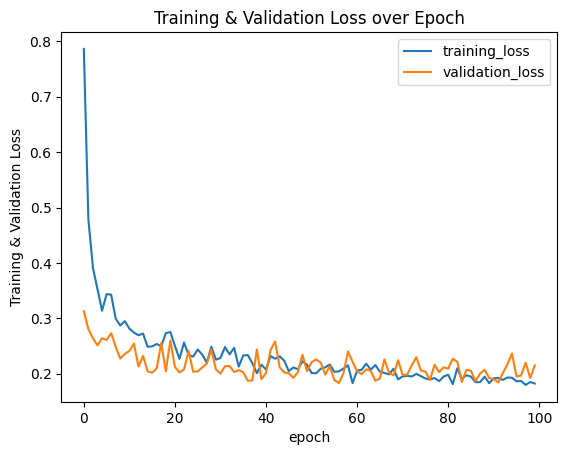

In [22]:
plot_epoch_loss(epoch_histry)

The training loss started high at 0.9 and decreased, while the validation loss began at around 0.3 and then plateaued. This pattern suggests that the model may be overfitting the training data, as ideally both losses should decrease together to indicate good generalisation.  

Ideally, we need to address this imbalance, perhaps by simplifying the model, increasing regularization, or using techniques like dropout. Other considerations are the size and diversity of the training dataset, as insufficient data can exacerbate overfitting issues.   

The goal is to create a model that performs well on both training and validation datasets, ensuring it can make accurate predictions on unseen data.

### Evaluation:  
- **Qualitative Analysis**  
    When evaluating a regression model, plotting predicted values against true values (actual observations) provides a visual assessment of model performance. Ideally, a good model's predictions will align closely with actual values, forming a 45-degree line (y = x) on a scatter plot.

    - **Close Fit:** Points along this line indicate that the model's predictions match the true values exactly. Each predicted value corresponds perfectly to its actual counterpart.  
    A **dense cluster** of points near the 45-degree line suggests strong model performance and effective learning of the data's patterns.  

    - **Error Representation:** Deviations from this line reveal prediction errors. Points above the line indicate underestimation, while points below indicate overestimation.  
    A **wide spread or random distribution** indicates poor performance, highlighting the model’s inability to accurately capture relationships in the data.  

    Predictions vs. true values should ideally form a 45-degree line for good model performance.
- **Quantitative Analysis**  
    - Metrics such as R² (coefficient of determination) alongside the visual plot to quantify how well the model explains the variance in the data.  
    An R² value close to 1 indicates that the model closely follows the 45-degree line, confirming good predictive power.

#### Qualitative Visual Analysis

In [ ]:
def plot_prediction(ann_model, y_test, y_predict, title="Actual Value vs. Predicted Value", color="g"):
    plt.plot(y_test, y_predict, ".", color=color)
    plt.xlabel("model prediction")
    plt.ylabel("actual value")
    plt.title(title)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


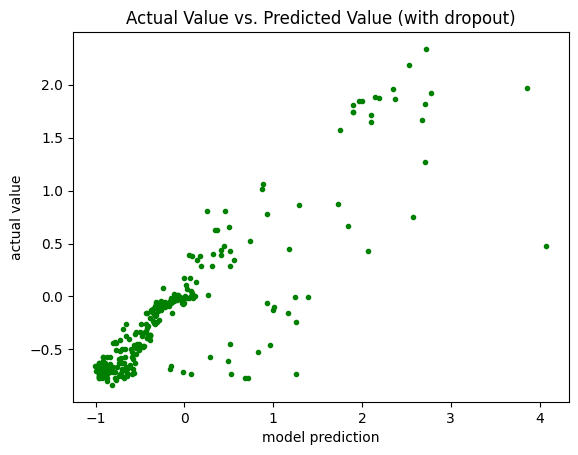

In [ ]:
y_predict = ann_model.predict(X_test)
plot_prediction(ann_model, y_test, y_predict, color="g", title="Actual Value vs. Predicted Value (with dropout)")
# plt.plot(y_test, y_predict, ".", color="g")
# plt.xlabel("model prediction")
# plt.ylabel("actual value")
# plt.title("Actual Value vs. Predicted Value")

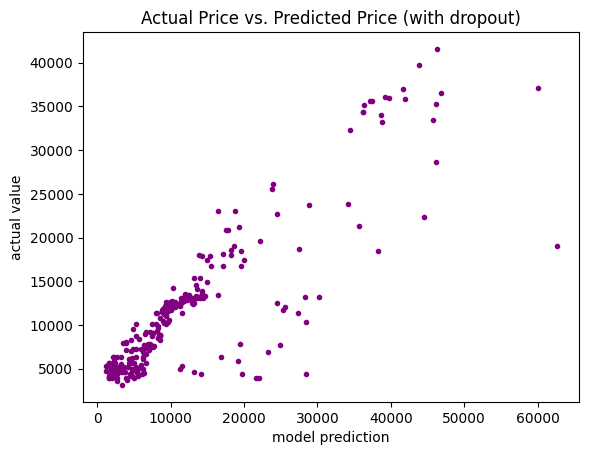

In [ ]:
y_predict_price = scaler_y.inverse_transform(y_predict)
y_test_price = scaler_y.inverse_transform(y_test)
plot_prediction(
    ann_model, y_test_price, y_predict_price, color="purple", title="Actual Price vs. Predicted Price (with dropout)"
)
# plt.plot(y_test_price, y_predict_price, ".", color="purple")
# plt.xlabel("model prediction (price)")
# plt.ylabel("actual value (price)")

#### Quantitative Performance Metrics

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


def calculate_metrics(y_test, y_predict):

    RMSE = root_mean_squared_error(y_test, y_predict)
    MSE = np.square(RMSE)
    # MSE = mean_squared_error(y_test_price, y_predict_price)  # Mean Squared Error
    # RMSE = np.sqrt(MSE)  # Root Mean Squared Error
    MAE = mean_absolute_error(y_test, y_predict)  # Mean Absolute Error
    r2 = r2_score(y_test, y_predict)

    N = len(y_test)  # number of observations
    K = X_test.shape[1]  # number of predictors(/features)
    print(f"number of observations: {N} and number of predictors(/features): {K}")
    adjusted_r2 = 1 - (1 - r2) * (N - 1) / (N - K - 1)
    print(f"MSE: {MSE}\nRMSE: {RMSE}\nMAE: {MAE}\nR-squared Error:{r2}\nAdjusted R-squared Error: {adjusted_r2}")

In [30]:
calculate_metrics(y_test_price, y_predict_price)

number of observations: 268 and number of predictors(/features): 8
MSE: 36920368.0
RMSE: 6076.21337890625
MAE: 3407.592529296875
R-squared Error:0.7145461440086365
Adjusted R-squared Error: 0.7057290364876677


## Experiment 2 - Further Analysis
- Deeper networks (e.g., more neurons, no dropout)
- Evaluate changes in performance metrics and potential overfitting.

In [ ]:
# Create the ANN model
ann_model_deeper = Sequential()

# Add layers to the model
ann_model_deeper.add(
    Input(shape=(8,))
)  # ann_model_deeper.add(Dense(50, input_dim=8)) # input_dim = no of input features = 8
ann_model_deeper.add(Activation("relu"))

ann_model_deeper.add(Dense(1000))
ann_model_deeper.add(Activation("relu"))

# ann_model_deeper.add(Dropout(0.5))

ann_model_deeper.add(Dense(1000))
ann_model_deeper.add(Activation("relu"))

# ann_model_deeper.add(Dropout(0.5))

ann_model_deeper.add(Dense(500))
ann_model_deeper.add(Activation("linear"))  # the output is continuous for regression, so the activation is linear

ann_model_deeper.add(Dense(1))  # output

# Compile the model
ann_model_deeper.compile(loss="mean_squared_error", optimizer="adam")

# Display the model summary
ann_model_deeper.summary()  # output shape (None, 50) means there's 50 neuron in the layer

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ activation_4 (Activation)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │         9,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,511,001 (5.76 MB)

 Trainable params: 1,511,001 (5.76 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
epoch_histry_deeper = ann_model_deeper.fit(X_train, y_train, epochs=100, batch_size=30, validation_split=0.2)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5618 - val_loss: 0.2521
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1883 - val_loss: 0.1952
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1723 - val_loss: 0.2015
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1870 - val_loss: 0.1950
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1910 - val_loss: 0.2145
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1654 - val_loss: 0.1892
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1407 - val_loss: 0.2046
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1706 - val_loss: 0.2047
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1663 - val_loss: 0.1858
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1565 - val_loss: 0.2052
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1658 - val_loss: 0.2063
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

while our model demonstrates a very low training loss of 0.0856, the rising validation loss of 0.2 signals a clear case of overfitting. This highlights the complexity of our network, which, despite its ability to capture intricate details in the training data, struggles to generalise effectively to unseen data. Moving forward, it will be crucial to implement strategies such as regularization or simplifying the model architecture to enhance its generalisation capabilities. This experience underscores the importance of balancing model complexity with the need for robust performance on validation datasets.

In [38]:
result_deeper = ann_model_deeper.evaluate(X_test, y_test)
accuracy_ann_deeper = 1 - result_deeper
logger.info(f"accuracy of deeper network: {accuracy_ann_deeper}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2412
[2024-11-04 23:04:37][1120302408.py(3)][<module>()]INFO: accuracy of deeper network: 0.7132771909236908


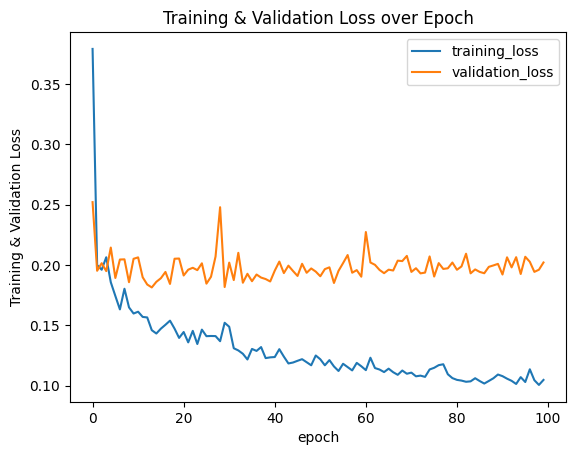

In [37]:
plot_epoch_loss(epoch_histry_deeper)

The model's low training loss paired with an increasing validation loss indicates that while the network has become highly adept at memorising the training data, it lacks the ability to generalise to new, unseen examples.

Overfitting often occurs when the model is excessively complex relative to the amount of training data available. This complexity allows the network to learn noise and specific patterns that do not translate well beyond the training set.

To mitigate this, techniques such as **dropout**, **early stopping**, or **regularization** methods like **L1** or **L2** are often employed. Additionally, simplifying the model architecture or augmenting the training data can help improve generalisation.  
Cross-validation can also be beneficial in assessing the model's performance more robustly.

Ultimately, a balance between model complexity and generalisation is the key. Continuous monitoring of both training and validation metrics throughout the training process will provide invaluable insights, guiding adjustments that lead to a more robust and effective model.

#### Qualitative Evaluation

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


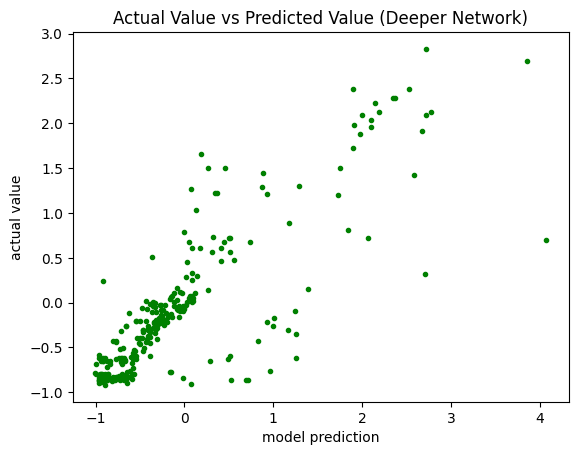

In [ ]:
y_predict_deeper = ann_model_deeper.predict(X_test)
plot_prediction(ann_model_deeper, y_test, y_predict_deeper, title="Actual Value vs Predicted Value (Deeper Network)")

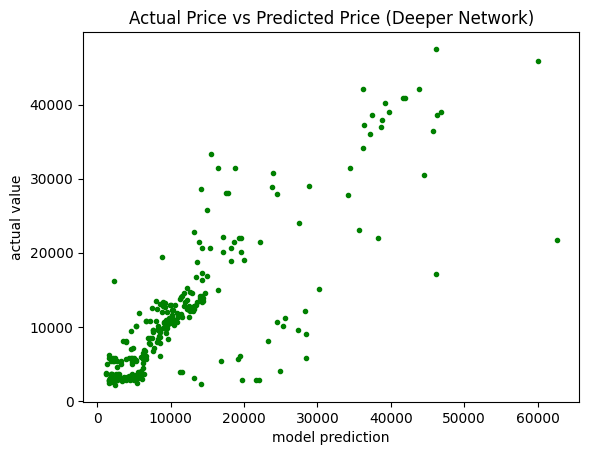

In [ ]:
y_test_price_deeper = scaler_y.inverse_transform(y_test)
y_predict_price_deeper = scaler_y.inverse_transform(y_predict_deeper)
plot_prediction(
    ann_model_deeper,
    y_test_price_deeper,
    y_predict_price_deeper,
    title="Actual Price vs Predicted Price (Deeper Network)",
)

#### Quantitative Evaluation

In [36]:
calculate_metrics(y_test_price_deeper, y_predict_price_deeper)

number of observations: 268 and number of predictors(/features): 8
MSE: 42017152.0
RMSE: 6482.06396484375
MAE: 3657.864990234375
R-squared Error:0.675139844417572
Adjusted R-squared Error: 0.6651055538976515


## Concludinng Remarks

In comparing Experiment 1 to Experiment 2, both use the same dataset size and number of predictors, yet Experiment 1 demonstrates a clear performance advantage across all metrics.  

Experiment 1 achieves a noticeable decrease in Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE), indicating a more accurate and better-fitting model overall.  

Additionally, Experiment 1 shows an increase in both R-squared and Adjusted R-squared values, suggesting it explains a greater proportion of the variance in the data than Experiment 2.  

Altogether, Experiment 1 provides a more reliable and accurate fit than Experiment 2.

**Increasing model complexity (neurons/layers) does not always improve performance; it can lead to overfitting.**  
Balance is crucial - optimise the model while ensuring good generalization to new data.